# Lab 8: Define and Solve an ML Problem of Your Choosing

In [1]:
import pandas as pd
import numpy as np
import os 
import matplotlib.pyplot as plt
import seaborn as sns
import gensim

In this lab assignment, you will follow the machine learning life cycle and implement a model to solve a machine learning problem of your choosing. You will select a data set and choose a predictive problem that the data set supports.  You will then inspect the data with your problem in mind and begin to formulate a  project plan. You will then implement the machine learning project plan. 

You will complete the following tasks:

1. Build Your DataFrame
2. Define Your ML Problem
3. Perform exploratory data analysis to understand your data.
4. Define Your Project Plan
5. Implement Your Project Plan:
    * Prepare your data for your model.
    * Fit your model to the training data and evaluate your model.
    * Improve your model's performance.

## Part 1: Build Your DataFrame

You will have the option to choose one of four data sets that you have worked with in this program:

* The "census" data set that contains Census information from 1994: `censusData.csv`
* Airbnb NYC "listings" data set: `airbnbListingsData.csv`
* World Happiness Report (WHR) data set: `WHR2018Chapter2OnlineData.csv`
* Book Review data set: `bookReviewsData.csv`

Note that these are variations of the data sets that you have worked with in this program. For example, some do not include some of the preprocessing necessary for specific models. 

#### Load a Data Set and Save it as a Pandas DataFrame

The code cell below contains filenames (path + filename) for each of the four data sets available to you.

<b>Task:</b> In the code cell below, use the same method you have been using to load the data using `pd.read_csv()` and save it to DataFrame `df`. 

You can load each file as a new DataFrame to inspect the data before choosing your data set.

In [2]:
# File names of the four data sets
adultDataSet_filename = os.path.join(os.getcwd(), "data", "censusData.csv")
airbnbDataSet_filename = os.path.join(os.getcwd(), "data", "airbnbListingsData.csv")
WHRDataSet_filename = os.path.join(os.getcwd(), "data", "WHR2018Chapter2OnlineData.csv")
bookReviewDataSet_filename = os.path.join(os.getcwd(), "data", "bookReviewsData.csv")


#df = pd.read_csv(WHRDataSet_filename, header = 0)
df = pd.read_csv(bookReviewDataSet_filename, header = 0)

df.head()
#print(df['country'])
# print(df.shape)
# nan_count = df.isnull().sum()# YOUR CODE HERE
# nan_count

,Review,Positive Review
0,This was perhaps the best of Johannes Steinhof...,True
1,This very fascinating book is a story written ...,True
2,The four tales in this collection are beautifu...,True
3,The book contained more profanity than I expec...,False
4,We have now entered a second time of deep conc...,True


## Part 2: Define Your ML Problem

Next you will formulate your ML Problem. In the markdown cell below, answer the following questions:

1. List the data set you have chosen.
2. What will you be predicting? What is the label?
3. Is this a supervised or unsupervised learning problem? Is this a clustering, classification or regression problem? Is it a binary classificaiton or multi-class classifiction problem?
4. What are your features? (note: this list may change after your explore your data)
5. Explain why this is an important problem. In other words, how would a company create value with a model that predicts this label?

I would like to use supervised learning on the book review dataset. Maybe use a different model that uses word embeddings instead of TF-IDF. After doing more research, I am planning on using the word2vec model since it handles word embeddings well. and then in the end, i can use the actual labels of each data point to check the model's accuracy.

This is a classification problem. I only have one feature which in its raw form, is the review itself, but I will convert it into word embeddings

This is an important problem because it can help authors assess whether or not their book is getting good feedback/responses without having to go through thousands of reviews manually. It saves a lot of time and resources which will always be valuable. It's also different from our past labs and specifically, our past lab using this same dataset. This is because the accuracy I got for using TF-IDF was only 80% on the test data, so hopefully, this approach will provide better results. 

## Part 3: Understand Your Data

The next step is to perform exploratory data analysis. Inspect and analyze your data set with your machine learning problem in mind. Consider the following as you inspect your data:

1. What data preparation techniques would you like to use? These data preparation techniques may include:

    * addressing missingness, such as replacing missing values with means
    * finding and replacing outliers
    * renaming features and labels
    * finding and replacing outliers
    * performing feature engineering techniques such as one-hot encoding on categorical features
    * selecting appropriate features and removing irrelevant features
    * performing specific data cleaning and preprocessing techniques for an NLP problem
    * addressing class imbalance in your data sample to promote fair AI
    

2. What machine learning model (or models) you would like to use that is suitable for your predictive problem and data?
    * Are there other data preparation techniques that you will need to apply to build a balanced modeling data set for your problem and model? For example, will you need to scale your data?
 
 
3. How will you evaluate and improve the model's performance?
    * Are there specific evaluation metrics and methods that are appropriate for your model?
    

Think of the different techniques you have used to inspect and analyze your data in this course. These include using Pandas to apply data filters, using the Pandas `describe()` method to get insight into key statistics for each column, using the Pandas `dtypes` property to inspect the data type of each column, and using Matplotlib and Seaborn to detect outliers and visualize relationships between features and labels. If you are working on a classification problem, use techniques you have learned to determine if there is class imbalance.

<b>Task</b>: Use the techniques you have learned in this course to inspect and analyze your data. You can import additional packages that you have used in this course that you will need to perform this task.

<b>Note</b>: You can add code cells if needed by going to the <b>Insert</b> menu and clicking on <b>Insert Cell Below</b> in the drop-drown menu.

In [3]:
y = df['Positive Review'] 
X = df['Review']

X.shape
print(X.shape)
X.head(10)
df.columns

(1973,)


Index(['Review', 'Positive Review'], dtype='object')

## Part 4: Define Your Project Plan

Now that you understand your data, in the markdown cell below, define your plan to implement the remaining phases of the machine learning life cycle (data preparation, modeling, evaluation) to solve your ML problem. Answer the following questions:

* Do you have a new feature list? If so, what are the features that you chose to keep and remove after inspecting the data? 
* Explain different data preparation techniques that you will use to prepare your data for modeling.
* What is your model (or models)?
* Describe your plan to train your model, analyze its performance and then improve the model. That is, describe your model building, validation and selection plan to produce a model that generalizes well to new data. 

I do not have a completely new feature list since I am only working with one feature. But I will be transforming the raw feature into a vectorized form for my model. For the data preparation technique, I will use the built-in function from Gensim to preprocess the text. This function will remove some stop words, covert all text to lowercase, remove punctuation and tokenize the text. I will be using the word2vec model. I will do this by converting my training and testing data to word embeddings.

Then I will convert the features in the training and test datasets into feature vectors using the word embeddings. I'll be using two models for comparison:
Random Forest Classifier: This ensemble method can capture complex patterns in the high-dimensional word embedding space.
Decision Tree Classifier: This will serve as a simpler baseline model and provide interpretable decision rules.
Both models will be trained on the feature vectors derived from the word embeddings.


My model building, validation, and selection plan is as follows:
Data Splitting: I'll use a train-test split to create separate training and testing datasets.
Word Embedding: I'll train a Word2Vec model on the entire corpus to create word embeddings.
Feature Vector Creation: I'll convert each document into a feature vector by averaging the word embeddings of its constituent words.
Model Training: I'll train both Random Forest and Decision Tree models on the training data.
Initial Evaluation: I'll evaluate both models on the test set using accuracy and other relevant metrics (e.g., precision, recall, F1-score).
Hyperparameter Tuning: For Random Forest, I'll tune parameters like the number of trees and maximum depth. For Decision Trees, I'll focus on parameters like maximum depth and minimum samples per leaf.
Model Comparison: I'll compare the performance of the tuned models to select the best performing one.
Final Evaluation: I'll evaluate the chosen model on a held-out test set to estimate its generalization performance.



## Part 5: Implement Your Project Plan

<b>Task:</b> In the code cell below, import additional packages that you have used in this course that you will need to implement your project plan.

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score
from sklearn.cluster import KMeans
from sklearn.feature_extraction.text import TfidfVectorizer


<b>Task:</b> Use the rest of this notebook to carry out your project plan. 

You will:

1. Prepare your data for your model.
2. Fit your model to the training data and evaluate your model.
3. Improve your model's performance by performing model selection and/or feature selection techniques to find best model for your problem.

Add code cells below and populate the notebook with commentary, code, analyses, results, and figures as you see fit. 

In [5]:
# Prepare Data
# Now that we have identified our features, let’s perform data preparation techniques to prepare our data for modeling.
# You will first clean your data by handling missing values and will then perform feature engi- neering by performing data aggregation and scaling.
# Handle Missing Data Task: Check if Dataframe df contains missing values, and sum up the resulting values by columns. Print the results.

nan_count = np.sum(df.isnull(), axis = 0)
nan_count
df = df.dropna()
np.sum(df.isnull(), axis = 0)
df.head(15)

,Review,Positive Review
0,This was perhaps the best of Johannes Steinhof...,True
1,This very fascinating book is a story written ...,True
2,The four tales in this collection are beautifu...,True
3,The book contained more profanity than I expec...,False
4,We have now entered a second time of deep conc...,True
5,I don't know why it won the National Book Awar...,False
6,The daughter of a prominent Boston doctor is d...,False
7,I was very disapointed in the book.Basicly the...,False
8,I think in retrospect I wasted my time on this...,False
9,I have a hard time understanding what it is th...,False


In [6]:
original_X = X
X = X.apply(lambda row: gensim.utils.simple_preprocess(row))
X.head()

0    [this, was, perhaps, the, best, of, johannes, ...
1    [this, very, fascinating, book, is, story, wri...
2    [the, four, tales, in, this, collection, are, ...
3    [the, book, contained, more, profanity, than, ...
4    [we, have, now, entered, second, time, of, dee...
Name: Review, dtype: object

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=.80, random_state=1234)

X_train.head()

1369    [as, my, brother, said, when, flipping, throug...
1366    [cooper, book, is, yet, another, warm, and, fu...
385     [have, many, robot, books, and, this, is, the,...
750     [as, china, re, emerges, as, dominant, power, ...
643     [have, been, huge, fan, of, michael, crichton,...
Name: Review, dtype: object

In [8]:
print("Begin")
word2vec_model = gensim.models.Word2Vec(X,
                                   vector_size=100,
                                   window=5,
                                   min_count=2)

print("End")

Begin
End


In [9]:
top25 = word2vec_model.wv.index_to_key[:25]
top25

['the',
 'of',
 'and',
 'to',
 'is',
 'in',
 'this',
 'it',
 'book',
 'that',
 'for',
 'as',
 'with',
 'was',
 'not',
 'you',
 'but',
 'are',
 'on',
 'have',
 'he',
 'be',
 'his',
 'or',
 'one']

In [10]:
pd.DataFrame({w:word2vec_model.wv[w] for w in top25}).T.style.background_gradient(cmap='coolwarm').set_precision(2)

/tmp/ipykernel_2141/931269524.py:1: FutureWarning: this method is deprecated in favour of `Styler.format(precision=..)`
  pd.DataFrame({w:word2vec_model.wv[w] for w in top25}).T.style.background_gradient(cmap='coolwarm').set_precision(2)


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99
the,-0.40,0.50,-0.47,-0.48,0.10,-0.99,0.22,1.58,-0.13,-1.21,-0.12,-0.76,-0.90,1.25,0.38,-0.38,0.16,0.11,-0.67,-1.16,0.80,-0.23,0.80,-0.08,0.60,0.10,-0.12,-0.06,-0.86,0.07,-0.26,0.36,0.37,-0.87,-0.56,0.35,0.84,-0.51,-0.68,-1.19,-0.17,-0.08,-0.16,-1.14,0.58,-0.16,-0.83,0.55,0.60,0.91,0.20,-1.15,-0.80,-0.15,0.13,-0.31,0.47,-0.75,-1.09,-0.21,0.14,-0.19,0.11,-0.31,-0.54,0.76,-0.04,0.41,-1.14,0.89,0.28,0.97,0.56,-1.08,0.68,-0.15,0.74,0.22,-0.19,0.01,0.28,-0.39,-0.38,0.89,0.04,-0.47,0.61,0.63,-0.08,0.36,0.61,0.68,0.72,0.18,0.45,0.81,-0.10,-1.25,-0.09,0.13
of,-0.61,0.27,-0.94,-0.95,0.80,-1.10,-0.14,1.08,-0.22,-1.08,-0.30,-0.72,-0.92,0.30,0.79,0.23,0.68,-0.00,-0.44,-0.70,0.56,-0.63,1.34,-0.04,0.20,-0.10,-0.36,-0.33,-0.26,1.38,0.83,-0.38,-0.58,-0.94,-0.19,0.61,1.08,-0.10,0.04,-1.11,-0.01,-0.67,-0.60,-0.78,0.01,-0.08,0.21,0.06,0.25,0.68,0.56,-1.44,-0.44,0.03,-0.32,0.39,0.60,-0.49,-0.78,0.02,-0.38,-0.06,0.64,-0.32,-0.75,1.25,0.93,0.17,-1.13,1.23,-0.05,0.10,1.19,0.16,0.29,0.13,-0.16,0.06,-0.90,-0.01,-0.06,0.50,0.14,0.70,-0.31,-0.78,0.01,0.77,0.72,0.08,0.78,0.88,0.88,-0.39,0.74,0.71,0.91,-1.40,0.66,0.10
and,-0.54,0.51,-0.23,-0.55,0.35,-1.23,-0.18,1.48,-0.15,-0.99,-0.50,-0.87,-0.32,0.33,0.61,-0.30,0.33,-0.48,-0.29,-0.77,0.55,-0.23,0.56,-0.08,-0.03,0.04,-0.29,0.09,-0.61,0.70,0.43,-0.17,-0.15,-0.58,-0.47,0.42,0.72,-0.45,-0.64,-1.25,-0.02,-0.36,-0.47,-0.37,0.55,-0.35,-0.20,0.09,0.17,0.52,0.30,-0.98,-0.52,-0.54,-0.28,0.33,0.51,-0.32,-0.62,-0.03,-0.02,0.22,0.29,-0.20,-0.88,0.90,0.38,0.51,-0.99,1.05,0.07,0.45,0.94,-0.37,0.37,0.13,0.06,-0.17,-0.69,0.21,-0.20,0.44,-0.34,0.83,-0.16,-0.44,-0.14,0.83,0.73,0.31,0.66,0.54,0.50,-0.00,0.74,0.56,0.43,-1.02,0.42,0.01
to,-0.97,0.30,0.45,-0.48,0.17,-0.89,-0.08,1.35,0.35,-0.74,-0.23,-1.05,0.56,-0.38,0.06,-0.40,0.72,-1.12,0.01,-0.98,0.49,0.69,0.25,0.07,-0.46,-0.05,0.15,0.56,-0.71,-0.13,0.80,0.40,0.07,-0.23,-0.65,1.39,0.59,-0.98,-1.52,-0.95,0.54,-0.74,-0.17,-0.04,1.02,-0.54,-0.43,-0.52,0.38,0.00,0.20,-0.61,-0.69,-1.19,-1.39,0.47,0.79,0.25,-0.06,0.44,0.72,0.44,0.86,-0.12,-0.93,0.07,-0.51,0.62,-0.97,0.82,0.39,0.72,0.71,0.48,0.74,0.09,0.09,-0.82,-1.05,0.41,0.01,0.54,-0.96,0.58,-0.75,-0.63,-0.11,1.10,0.81,0.17,0.39,1.04,-0.08,0.08,1.54,0.68,0.36,-1.03,0.39,-0.27
is,-0.71,0.88,-0.81,-0.25,0.77,-0.71,0.26,1.01,-1.31,-0.52,-0.32,-0.47,-0.27,-0.00,0.49,-0.39,0.61,-0.34,-0.11,-1.79,0.72,0.02,1.39,0.59,0.18,-0.02,-0.43,-0.63,-0.49,0.16,0.93,0.43,0.31,-1.01,0.67,0.80,-0.07,0.40,0.09,-1.36,0.03,-1.39,-0.30,0.45,0.11,-0.65,-0.14,0.09,-0.24,-0.13,0.05,-0.50,-0.23,-0.02,-0.09,-0.19,0.11,-0.87,-0.86,-0.05,0.26,-0.06,0.92,0.22,-1.05,0.77,0.41,1.25,-1.16,1.16,-0.01,0.82,0.85,0.72,1.00,0.32,0.15,0.58,-0.37,-0.68,-0.18,-0.58,0.25,0.60,-0.27,-0.26,0.86,0.90,0.38,-0.18,1.48,0.67,0.62,-0.45,1.56,0.63,0.63,-0.48,0.05,-0.24
in,-0.56,0.37,-0.53,-0.68,0.49,-0.99,0.01,1.06,-0.34,-0.92,-0.26,-0.70,-0.49,0.03,0.57,-0.05,0.52,-0.41,-0.34,-0.91,0.42,-0.15,1.05,0.02,-0.08,-0.08,-0.29,-0.30,-0.36,0.86,0.80,-0.21,-0.14,-0.77,-0.20,0.72,0.73,-0.21,-0.27,-1.18,0.12,-0.63,-0.43,-0.34,0.32,-0.31,-0.02,0.06,0.17,0.42,0.30,-1.03,-0.37,-0.16,-0.39,0.36,0.50,-0.44,-0.55,0.08,-0.07,-0.04,0.75,-0.18,-0.82,0.97,0.48,0.38,-1.20,1.03,-0.11,0.40,1.08,0.19,0.38,0.16,-0.02,-0.10,-0.80,0.02,-0.07,0.30,-0.15,0.72,-0.31,-0.60,0.02,0.85,0.72,0.20,0.83,0.78,0.51,-0.24,0.92,0.55,0.63,-0.95,0.58,-0.11
this,0.29,0.31,0.02,-0.01,0.11,-0.32,0.59,1.10,-0.48,-0.38,1.06,-0.71,-0.48,1.00,-0.40,-0.53,0.79,0.56,-0.11,-1.43,0.46,0.24,1.04,0.22,-0.07,0.26,0.25,-0.14,-0.54,-0.93,0.29,0.67,1.58,-0.86,-0.64,0.53,-0.09,-1.24,-1.12,-0.79,0.61,-0.40,0.79,-0.23,0.92,0.03,-1.25,0.11,0.36,0.09,-0.29,-1.35,-1.41,0.03,-1.19,-0.38,0.55,-0.66,-1.27,-0.10,0.56,-0.83,1.10,0.49,-0.72,1.36,-0.98,0.84,-1.59,0.61,

In [11]:
words = set(word2vec_model.wv.index_to_key)

print('Begin transforming X_train')
X_train_word_embeddings = np.array([np.array([word2vec_model.wv[word] for word in words if word in training_example])
                        for training_example in X_train], dtype=object)
print('Finish transforming X_train')

print('Begin transforming X_test')
X_test_word_embeddings = np.array([np.array([word2vec_model.wv[word] for word in words if word in training_example])
                        for training_example in X_test], dtype=object)
print('Finish transforming X_test')


Begin transforming X_train
Finish transforming X_train
Begin transforming X_test
Finish transforming X_test


In [12]:
X_train_feature_vector = []
for w in X_train_word_embeddings:
    if w.size:
        X_train_feature_vector.append(w.mean(axis=0))
    else:
        X_train_feature_vector.append(np.zeros(50, dtype=float))
        
X_test_feature_vector = []
for w in X_test_word_embeddings:
    if w.size:
        X_test_feature_vector.append(w.mean(axis=0))
    else:
        X_test_feature_vector.append(np.zeros(50, dtype=float))

In [13]:
print('Number of words in first training example: {0}'.format(len(X_train.iloc[0])))
print('First word in first training example: {0}'.format(X_train.iloc[0][0]))
print('Second word in first training example: {0}\n'.format(X_train.iloc[0][1]))

print('Number of word vectors in first training example: {0}'.format(len(X_train_word_embeddings[0])))
print('First word vector in first training example:\n {0}'.format(X_train_word_embeddings[0][0]))
print('\nSecond word vector in first training example: \n {0}\n'.format(X_train_word_embeddings[0][1]))


Number of words in first training example: 145
First word in first training example: as
Second word in first training example: my

Number of word vectors in first training example: 101
First word vector in first training example:
 [-0.34028962  0.398633   -0.07964905 -0.17305084  0.2481465  -0.7722487
  0.2014212   0.99407935 -0.34199107 -0.56584674 -0.02498657 -0.7305427
 -0.1094211   0.22059558  0.25787807 -0.3161779   0.2793759  -0.26966423
 -0.17254812 -0.8795433   0.36721984  0.12653384  0.5160716  -0.01264379
 -0.09657769  0.02101636 -0.15548658 -0.09032021 -0.3967368   0.16073917
  0.48895395 -0.01704194  0.39464432 -0.5230361  -0.27152067  0.54610384
  0.2985734  -0.29903895 -0.52864975 -0.80886817  0.15679333 -0.44040734
 -0.16890566 -0.0474746   0.41344127 -0.24168788 -0.32593837 -0.00376979
  0.11522321  0.15734743  0.05921794 -0.5660691  -0.33552235 -0.25819364
 -0.3665026   0.19407664  0.31065953 -0.1470372  -0.36383188  0.15523797
  0.12573597 -0.05739086  0.43289334  0.0

In [14]:
print('Number of word vectors in first five examples in training set:')
for w in range(0, 5):
    print(len(X_train_word_embeddings[w]))


Number of word vectors in first five examples in training set:
101
71
88
140
102


In [15]:
X_train_feature_vector = []
for w in X_train_word_embeddings:
    if w.size:
        X_train_feature_vector.append(w.mean(axis=0))
    else:
        X_train_feature_vector.append(np.zeros(100, dtype=float))
        
X_test_feature_vector = []
for w in X_test_word_embeddings:
    if w.size:
        X_test_feature_vector.append(w.mean(axis=0))
    else:
        X_test_feature_vector.append(np.zeros(100, dtype=float))

In [16]:
for w in range(0, 5):
    print('Length of training example {0}: {1}'.format(w, len(X_train_feature_vector[w])))
    
print('First training example\'s feature vector: \n{0}'.format(X_train_feature_vector[0]))

Length of training example 0: 100
Length of training example 1: 100
Length of training example 2: 100
Length of training example 3: 100
Length of training example 4: 100
First training example's feature vector: 
[-0.314783    0.392199    0.0300364  -0.11625456  0.18341878 -0.8281179
  0.2163921   1.0511352  -0.3100003  -0.5337558   0.00562744 -0.78997046
  0.03533126  0.15514526  0.1581504  -0.36763528  0.2562899  -0.369437
 -0.04836291 -0.9517113   0.32573047  0.22593126  0.36542895 -0.03987774
 -0.14511447  0.01549873 -0.14611818  0.00510838 -0.4484654  -0.05753985
  0.46288416  0.05842035  0.5142367  -0.43590677 -0.2567756   0.6023418
  0.17177264 -0.35566983 -0.66903806 -0.8150849   0.21831447 -0.46178663
 -0.16538158  0.11495192  0.5305212  -0.31053117 -0.38773817 -0.06084834
  0.09621616  0.0952443   0.03573486 -0.3995966  -0.27081445 -0.4410287
 -0.45512855  0.20940012  0.30152035 -0.05488507 -0.30372658  0.2224295
  0.24908467 -0.05748791  0.33678263  0.10121094 -0.5237613   0.

In [17]:
# Convert feature vectors to numpy arrays
X_train_feature_vector = np.array(X_train_feature_vector)
X_test_feature_vector = np.array(X_test_feature_vector)

# Ensure y_train and y_test are numpy arrays
y_train = np.array(y_train)
y_test = np.array(y_test)

print(X_train_feature_vector)

[[-0.314783    0.392199    0.0300364  ... -0.31819296  0.1018608
  -0.16544363]
 [-0.29426926  0.38605997 -0.03231945 ... -0.36432755  0.10575968
  -0.1327625 ]
 [-0.2658472   0.41295883 -0.08894306 ... -0.35956156  0.09644233
  -0.16992582]
 ...
 [-0.29981726  0.4024996  -0.01628999 ... -0.30097052  0.0676128
  -0.19212492]
 [-0.2716582   0.39674827 -0.06881506 ... -0.34887493  0.0956883
  -0.16746275]
 [-0.3101458   0.44966415 -0.06069123 ... -0.45722836  0.07177728
  -0.20501722]]


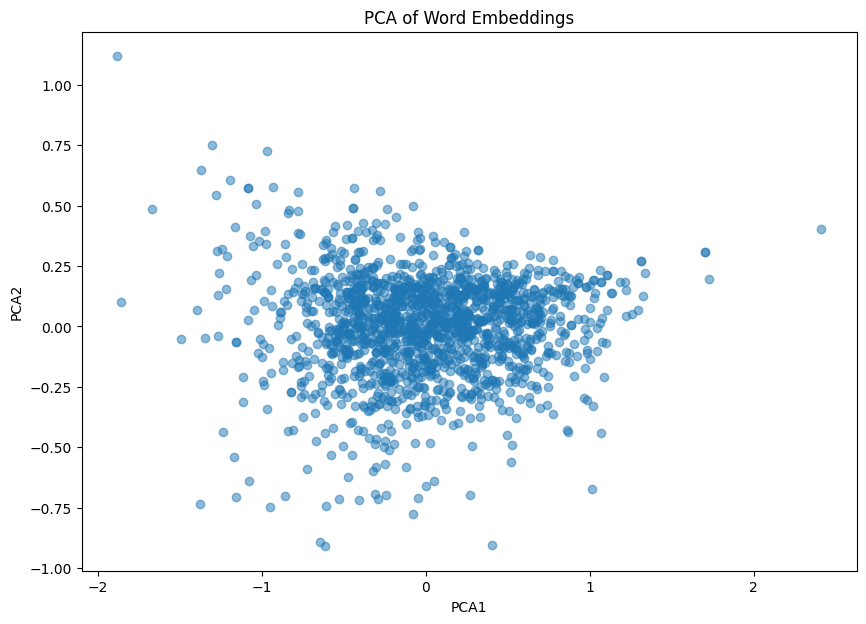

In [18]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Assuming df_feature_vectors is your DataFrame with shape (1973, 100)

# Create a PCA object to reduce the data to 2 dimensions
pca = PCA(n_components=2)
pca_result = pca.fit_transform(X_train_feature_vector)

# Create a DataFrame with the PCA results
df_pca = pd.DataFrame(pca_result, columns=['PCA1', 'PCA2'])

# Plot the PCA results
plt.figure(figsize=(10, 7))
plt.scatter(df_pca['PCA1'], df_pca['PCA2'], alpha=0.5)
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.title('PCA of Word Embeddings')
plt.show()


In [19]:
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score


# Convert feature vectors to numpy arrays
X_train_feature_vector = np.array(X_train_feature_vector)
X_test_feature_vector = np.array(X_test_feature_vector)

# Ensure y_train and y_test are numpy arrays
y_train = np.array(y_train)
y_test = np.array(y_test)

# Print the shape of the feature vectors to verify
print("X_train_feature_vector shape:", X_train_feature_vector.shape)
print("X_test_feature_vector shape:", X_test_feature_vector.shape)
# print("X_train:", X_train_feature_vector)
# print("X_test:", X_test_feature_vector)

# Create the KNN classifier
knn_model = KNeighborsClassifier(n_neighbors=5)

# Fit the model to the training data
knn_model.fit(X_train_feature_vector, y_train)

# Predict on the test data
predictions = knn_model.predict(X_test_feature_vector)

# Calculate accuracy
accuracy = accuracy_score(y_test, predictions)


# Calculate precision, recall, and F1-score
precision = precision_score(y_test, predictions, average='weighted')
recall = recall_score(y_test, predictions, average='weighted')
f1 = f1_score(y_test, predictions, average='weighted')

# Print the performance metrics
print(f"Accuracy: {accuracy * 100:.2f}%")
print(f"Precision: {precision * 100:.2f}%")
print(f"Recall: {recall * 100:.2f}%")
print(f"F1 Score: {f1 * 100:.2f}%")


X_train_feature_vector shape: (1578, 100)
X_test_feature_vector shape: (395, 100)
Accuracy: 60.25%
Precision: 60.25%
Recall: 60.25%
F1 Score: 60.25%


X_train_feature_vector shape: (1578, 100)
X_test_feature_vector shape: (395, 100)

Best number of neighbors: 17
Best accuracy: 67.09%


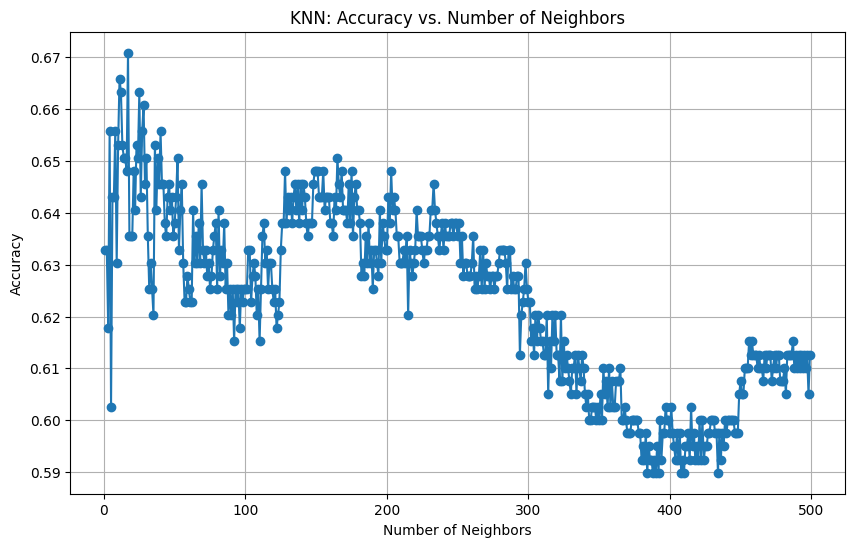

In [20]:
# now test other possible K's

import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt


# Convert feature vectors to numpy arrays
X_train_feature_vector = np.array(X_train_feature_vector)
X_test_feature_vector = np.array(X_test_feature_vector)

# Ensure y_train and y_test are numpy arrays
y_train = np.array(y_train)
y_test = np.array(y_test)

# Print the shape of the feature vectors to verify
print("X_train_feature_vector shape:", X_train_feature_vector.shape)
print("X_test_feature_vector shape:", X_test_feature_vector.shape)

# Define the range of neighbors to try
neighbor_range = range(1, 500)  

# Dictionary to store accuracies
accuracies = {}
knn_model = None
# Iterate through different numbers of neighbors
for n_neighbors in neighbor_range:
    # Create and train the KNN model
    knn_model = KNeighborsClassifier(n_neighbors=n_neighbors)
    knn_model.fit(X_train_feature_vector, y_train)
    
    # Make predictions and calculate accuracy
    predictions = knn_model.predict(X_test_feature_vector)
    accuracy = accuracy_score(y_test, predictions)
    
    # Store the accuracy
    accuracies[n_neighbors] = accuracy
    
    # print(f"Neighbors: {n_neighbors}, Accuracy: {accuracy * 100:.2f}%")

# Find the best number of neighbors
best_n_neighbors = max(accuracies, key=accuracies.get)
best_accuracy = accuracies[best_n_neighbors]

print(f"\nBest number of neighbors: {best_n_neighbors}")
print(f"Best accuracy: {best_accuracy * 100:.2f}%")

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(list(accuracies.keys()), list(accuracies.values()), marker='o')
plt.title('KNN: Accuracy vs. Number of Neighbors')
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.grid(True)
plt.show()


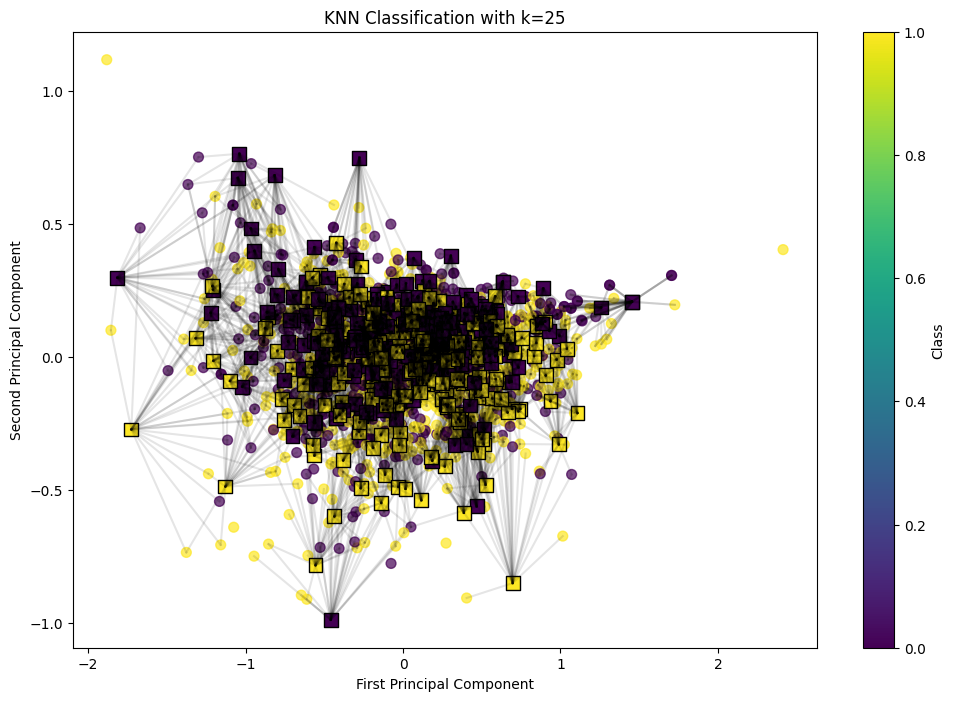

In [21]:
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Assuming X_train_feature_vector, X_test_feature_vector, y_train, y_test are defined

# Reduce dimensionality to 2D
pca = PCA(n_components=2)
X_train_2d = pca.fit_transform(X_train_feature_vector)
X_test_2d = pca.transform(X_test_feature_vector)

# Choose a value for k
k = 25  # or any other value you want to visualize

# Train the KNN model
knn_model = KNeighborsClassifier(n_neighbors=k)
knn_model.fit(X_train_feature_vector, y_train)

# Get the indices of the k nearest neighbors for each test point
_, indices = knn_model.kneighbors(X_test_feature_vector)

# Plot
plt.figure(figsize=(12, 8))

# Plot training points
plt.scatter(X_train_2d[:, 0], X_train_2d[:, 1], c=y_train, cmap='viridis', alpha=0.7, s=50)

# Plot test points
plt.scatter(X_test_2d[:, 0], X_test_2d[:, 1], c=y_test, cmap='viridis', marker='s', s=100, edgecolors='black')

# Draw lines from each test point to its k nearest neighbors
for i, neighbors in enumerate(indices):
    for neighbor in neighbors:
        plt.plot([X_test_2d[i, 0], X_train_2d[neighbor, 0]], 
                 [X_test_2d[i, 1], X_train_2d[neighbor, 1]], 
                 'k-', alpha=0.1)

plt.title(f'KNN Classification with k={k}')
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.colorbar(label='Class')
plt.show()


In [22]:
import pandas as pd
import numpy as np
import os 
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import OneHotEncoder 
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

def train_test_DT(X_train, X_test, y_train, y_test, depth, leaf=1, crit='entropy'):
    
         # 1. Create the  Scikit-learn DecisionTreeClassifier model object below and assign to 
        # variable 'model'
      # YOUR CODE HERE
    model = DecisionTreeClassifier(criterion = crit, max_depth = depth, min_samples_leaf = leaf)

    # 2. Fit the model to the training data below
     # YOUR CODE HERE
    model.fit(X_train, y_train)

    # 3. Make predictions on the test data and assign the result to the 
        # variable 'class_label_predictions' below
     # YOUR CODE HERE
     
  
   # 4. Compute various performance metrics
    acc_score = accuracy_score(y_test, class_label_predictions)
    prec_score = precision_score(y_test, class_label_predictions, average='weighted')
    rec_score = recall_score(y_test, class_label_predictions, average='weighted')
    f1 = f1_score(y_test, class_label_predictions, average='weighted')
    
    # 5. Return all metrics as a dictionary
    return {
        'accuracy': acc_score,
        'precision': prec_score,
        'recall': rec_score,
        'f1_score': f1
    }




Best maximum depth: 1
Best accuracy: 66.33%


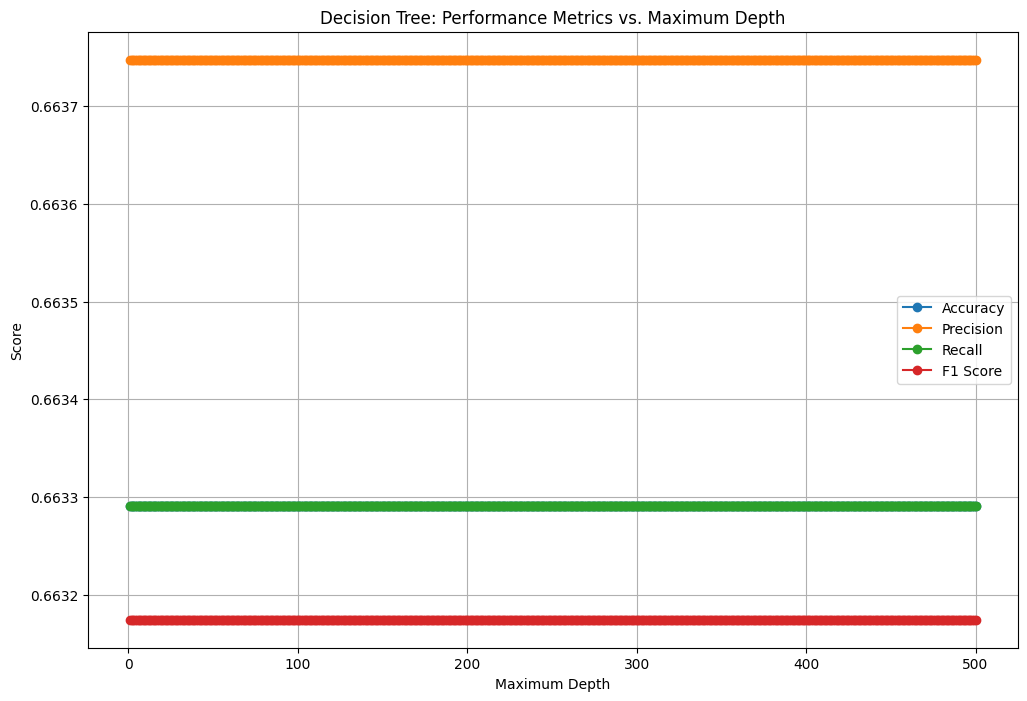

In [25]:
# Define the range of maximum depths to try
depth1 = 1
depth2 = 500
max_depth_range = range(depth1, depth2 + 1)

# Lists to store metrics
accuracies = []
precisions = []
recalls = []
f1_scores = []

# Iterate through different maximum depths
for md in max_depth_range:
    # Train and test the Decision Tree model
    scores = train_test_DT(X_train_feature_vector, X_test_feature_vector, y_train, y_test, md)
    
    # Store the metrics
    accuracies.append(scores['accuracy'])
    precisions.append(scores['precision'])
    recalls.append(scores['recall'])
    f1_scores.append(scores['f1_score'])

# Find the best maximum depth based on accuracy
best_max_depth = max_depth_range[np.argmax(accuracies)]
best_accuracy = max(accuracies)

print(f"\nBest maximum depth: {best_max_depth}")
print(f"Best accuracy: {best_accuracy * 100:.2f}%")

# Convert results to a DataFrame for easy analysis
results_df = pd.DataFrame({
    'max_depth': max_depth_range,
    'accuracy': accuracies,
    'precision': precisions,
    'recall': recalls,
    'f1_score': f1_scores
})

# Plot the results
plt.figure(figsize=(12, 8))

plt.plot(results_df['max_depth'], results_df['accuracy'], marker='o', label='Accuracy')
plt.plot(results_df['max_depth'], results_df['precision'], marker='o', label='Precision')
plt.plot(results_df['max_depth'], results_df['recall'], marker='o', label='Recall')
plt.plot(results_df['max_depth'], results_df['f1_score'], marker='o', label='F1 Score')

plt.title('Decision Tree: Performance Metrics vs. Maximum Depth')
plt.xlabel('Maximum Depth')
plt.ylabel('Score')
plt.legend()
plt.grid(True)
plt.show()

Accuracy of Decision Tree with depth 5: 66.33%


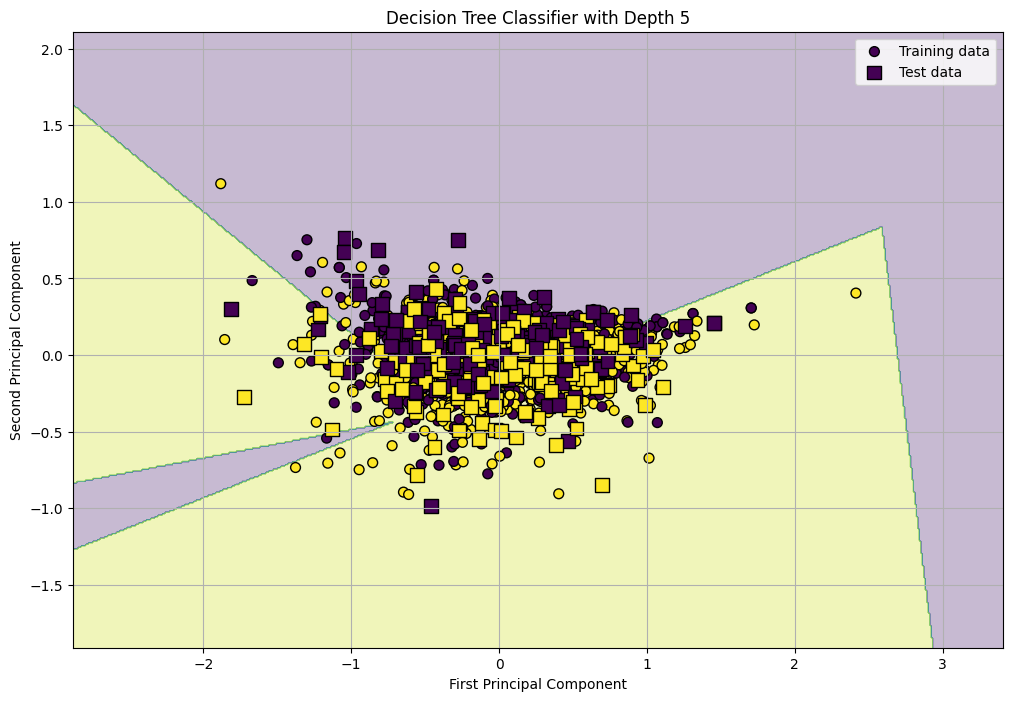

In [24]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.decomposition import PCA

# Assuming X_train_feature_vector, X_test_feature_vector, y_train, y_test are defined

# Reduce dimensionality to 2D for visualization
pca = PCA(n_components=2)
X_train_2d = pca.fit_transform(X_train_feature_vector)
X_test_2d = pca.transform(X_test_feature_vector)

# Train the Decision Tree model
depth = 5  # You can adjust this depth
dt_model = DecisionTreeClassifier(max_depth=depth, criterion='entropy')
dt_model.fit(X_train_feature_vector, y_train)

# Make predictions on the test data
class_label_predictions = dt_model.predict(X_test_feature_vector)
acc_score = accuracy_score(y_test, class_label_predictions)

print(f"Accuracy of Decision Tree with depth {depth}: {acc_score * 100:.2f}%")

# Create a mesh grid for plotting decision boundaries
x_min, x_max = X_train_2d[:, 0].min() - 1, X_train_2d[:, 0].max() + 1
y_min, y_max = X_train_2d[:, 1].min() - 1, X_train_2d[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                     np.arange(y_min, y_max, 0.01))

# Predict the class for each point in the mesh grid
Z = dt_model.predict(pca.inverse_transform(np.c_[xx.ravel(), yy.ravel()]))
Z = Z.reshape(xx.shape)

# Plot the decision boundary
plt.figure(figsize=(12, 8))
plt.contourf(xx, yy, Z, alpha=0.3, cmap='viridis')

# Plot training points
plt.scatter(X_train_2d[:, 0], X_train_2d[:, 1], c=y_train, cmap='viridis', edgecolors='k', s=50, label='Training data')

# Plot test points
plt.scatter(X_test_2d[:, 0], X_test_2d[:, 1], c=y_test, marker='s', edgecolors='black', s=100, label='Test data')

# Add labels and title
plt.title(f'Decision Tree Classifier with Depth {depth}')
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.legend()
plt.grid(True)
plt.show()


**Analysis and Conclusion:**

After performing K-Nearest Neighbors and Decision Trees on the embeddings of the reviews, the accuracy of both models are very similar to each other. However, KNN does slightly better by 2%. Overall, both models performed pretty poorly with around 65% accuracy. This is probably due to the fact that we are only using one feature and have limited data. Low accuracy could also indicate that our data is more complex than the models themselves. Our models could not capture the complex relationships between the data points, suggesting that our data needs a model that can capture nonlinear relationships better. The reason why I wanted to use KNN and DTs was because I felt that reviews that had more semantically similar features would be grouped closer together, so using a KNN for example would be a perfect model to help group/classify reviews that had similar embeddings. It did slightly better than straight guessing, but the model could definitely be improved by using a more complex model. What would have helped would have been more features to help our model make better predictions. For future improvements, I would consider creating new / additional features to help our model draw better relationships/connections. 

After first testing my model, I improved it by experimenting with the hyper parameters. For example, for KNNs, I tested 1 - 500 neighbors and tried to see if a certain K gave better results.I found that actually, the more neighbors we had (past 200), the worse our accuracy became. It seems that anything less than 30 neighbors provided decent predictions relative to the rest of the other possible neighbors. For DTs, I performed the same experiment, testing 1- 500 possible depths and found that the deeper our depth, the better our accuracy became (but not by much). This makes sense to me since the deeper the levels become, the more our model fits to very specific data points, and then it becomes prone to overfitting. So ideally, too deep of a tree is not the goal. But either way, our DT average accuracy was around 64% which is around the same as KNNs. This further confirms to me that we need a more complex model to capture the relationship between the data points. 

Although my accuracy was not as high I would have liked, I was still able to learn about the importance of choosing the right model that fits our data. Complex data usually requires complex models. Especially with data that are sequential, typical linear models don’t perform very well.

I found creating visual graphs really helpful. It has helped me see examples of how my model is working, and how it interprets the data. 

